In [1]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import time
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Splinter Setup
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
#Site to Scrape
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)

In [4]:
#Applying to Soup
html = browser.html
soup = bs(html, "html.parser")

In [5]:
time.sleep(2)

In [6]:
#Scrape data
rover_data = soup.find_all('tr', class_='data-row')                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
rover_data


[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [7]:
#Convert data to a list
list_of_rows = []
for row in rover_data:
    td = row.find_all('td')
    row = [col.text for col in td]
    list_of_rows.append(row)
list_of_rows

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
#Convert to a DataFrame
rover_df=DataFrame(list_of_rows, columns =['id','terrestrial_date', 'sol', 'ls','month', 'min_temp', 'pressure'])
rover_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
#Datatype check
rover_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
#DataFrame column datatype change
rover_df['id'] = rover_df['id'].astype('int')
rover_df['sol'] = rover_df['sol'].astype('int')
rover_df['ls'] = rover_df['ls'].astype('int')
rover_df['month'] = rover_df['month'].astype('int')
rover_df['min_temp'] = rover_df['min_temp'].astype('float')
rover_df['pressure'] = rover_df['pressure'].astype('float')
rover_df['terrestrial_date'] = pd.to_datetime(rover_df['terrestrial_date'])

In [11]:
#DataFrame column datatype re-check
rover_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

In [22]:
#Monthly temp average
temp_avg=rover_df.groupby("month")["min_temp"].apply(np.mean)
temp_avg


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

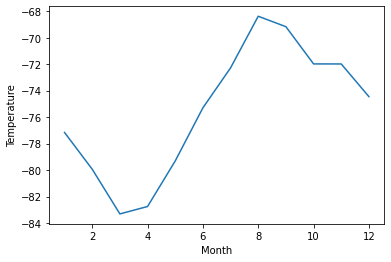

In [25]:
#Plotting the temp average data
temp_avg.plot.line()
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.show()

In [30]:
#Save the graph
plt.savefig("../Module-12-Challenge/temperature.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [26]:
#Monthly atmospheric pressure data
press_avg=rover_df.groupby("month")["pressure"].apply(np.mean)
press_avg

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

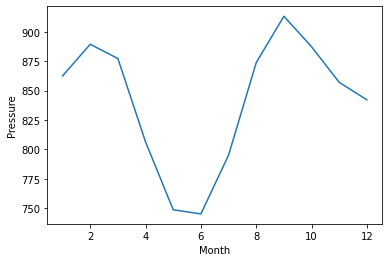

In [28]:
#Plotting the atmospheric pressure data
press_avg.plot.line()
plt.xlabel("Month")
plt.ylabel("Pressure")
plt.show()

In [29]:
#Save the graph
plt.savefig("../Module-12-Challenge/pressure.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [41]:
#Daily temperature average
daily_temp=rover_df.groupby("sol")["min_temp"].apply(np.mean)
daily_temp

sol
10     -75.0
11     -76.0
12     -76.0
13     -74.0
14     -74.0
        ... 
1973   -78.0
1974   -77.0
1975   -76.0
1976   -77.0
1977   -77.0
Name: min_temp, Length: 1867, dtype: float64

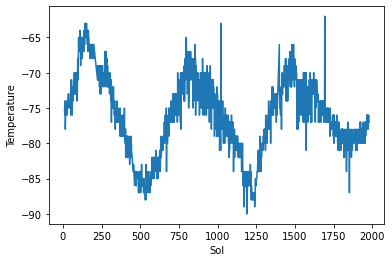

In [47]:
#Plotting daily temperature average
daily_temp.plot.line()
plt.xlabel("Sol")
plt.ylabel("Temperature")
plt.show()

In [48]:
#Save the graph
plt.savefig("../Module-12-Challenge/daily_temp.png")
plt.show()

<Figure size 432x288 with 0 Axes>

In [49]:
#Convert DataFrame into a .csv file **Needs work
rover_df.to_csv(r'C:\Users\OPanopio\Desktop\Data Analytics\Challenges\Module-12-Challenge\rover.csv')